In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

# (A)

In [6]:
def dxdt(x,t,k1,k2,k3,k4,a,b):
    return k1*a*x**2 - k2*x**3 - k4*x + k3*b

In [3]:
k1=3
k2=.6
k3=.25
k4=2.95

In [4]:
a=b=1

number of roots of a=b=1 are 2
number of roots of a=0.5 b=30 are 1


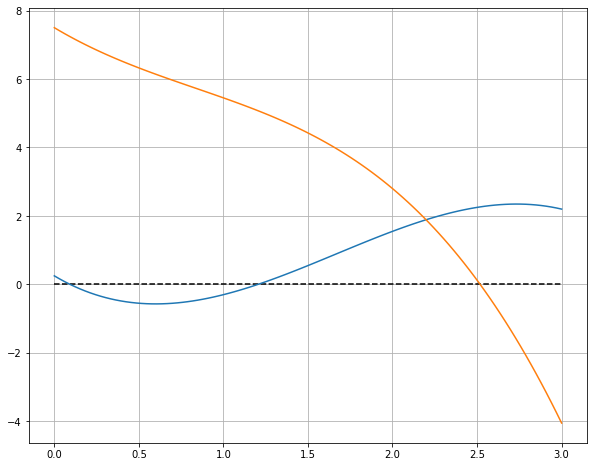

In [55]:
x = np.linspace(0,3,100)
#X = odeint(dxdt,10,t, (k1,k2,k3,k4,a,b))
x_prime = dxdt(x,_,k1,k2,k3,k4,1,1)
x_prime_2 = dxdt(x,_,k1,k2,k3,k4,.5,30)
plt.figure(figsize=(10,8))
plt.plot(t,x_prime)
plt.plot(t,x_prime_2)
plt.grid()
plt.hlines(0,0,3,linestyles='dashed')
np.where(x_prime[0:-2]*x_prime[1:-1]<0)
print("number of roots of a=b=1 are %d"%np.sum(x_prime[0:-2]*x_prime[1:-1]<0))
print("number of roots of a=0.5 b=30 are %d"%np.sum(x_prime_2[0:-2]*x_prime_2[1:-1]<0))

# (c)

In [4]:
def Gillespie(x0, t_f):
    x = x0
     
    t = 0
    X_trace = [x0]
    t_trace = [0]
    
    a = 1
    b = 2
    VNA=20
    k1=3
    k2=.6
    k3=.25
    k4=2.95
    Nr = [[1,-1,1,-1]]
    
    while t < t_f:
        alpha = [(a*k1*x*(x-1))/VNA, (k2*x*(x-1)*(x-2))/VNA**2, b*k3*VNA, x*k4]
        W = np.sum(alpha)
        u1 = np.random.rand()
        tau = -np.log(u1)/W
        r = np.where(np.cumsum(alpha)>=W*np.random.rand())[0][0]
        
        while alpha[r] == 0:
            r = r + 1
        x = x + Nr[0][r]
        t = t + tau
        if t < t_f:
            t_trace.append(t)
            X_trace.append(x)
    return X_trace, t_trace

In [7]:
x0 = 0
t_f = 10**4
X_trace, t_trace = Gillespie(x0, t_f)

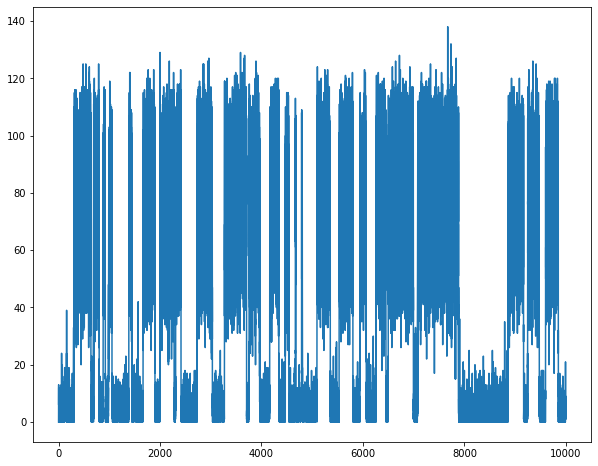

In [13]:
plt.figure(figsize=(10,8))
plt.plot(np.array(t_trace),np.array(X_trace[:]))

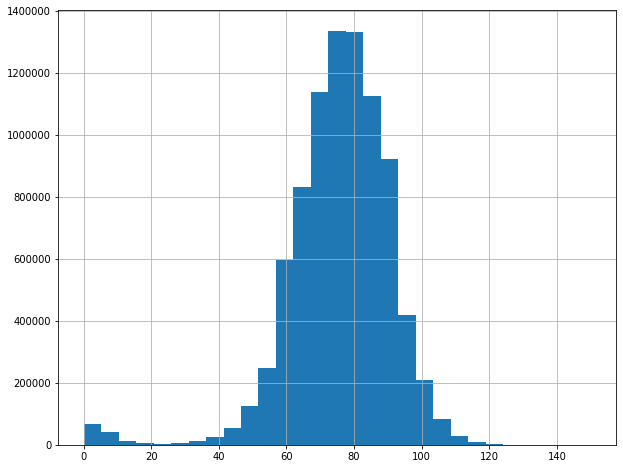

In [37]:
plt.figure(figsize=(10,8))
plt.hist(X_trace,bins=np.linspace(0,150,30))
plt.grid()

# (d)

In [22]:
def Chemical_master(VNA,n):
    k1=3
    k2=.6
    k3=.25
    k4=2.95
    a = 1
    b = 2
    
    lamda = []
    mu = []
    for i in range(n+1):
        lamda.append(((a*k1*i*(i-1))/VNA+ b*k3*VNA))
        mu.append((k4*i)+((k2*i*(i-1)*(i-2))/VNA**2))
    lamda = np.array(lamda)
    mu = np.array(mu)
    M = np.diag(lamda[0:-1],-1) + np.diag(mu[1:],1) + np.diag((lamda+mu)*-1)
    return (M)

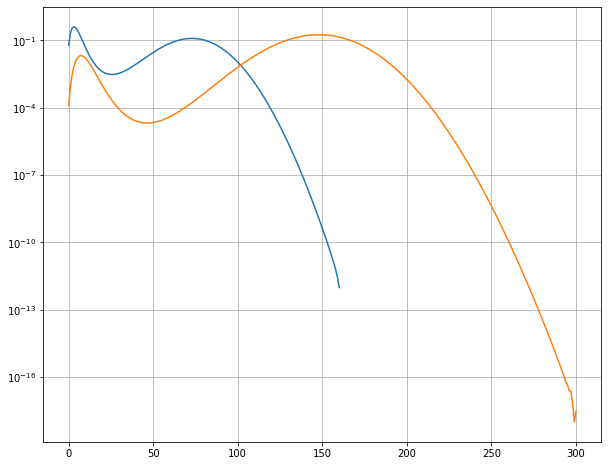

In [32]:
M1 = Chemical_master(20,160)
M2 = Chemical_master(40,300)
_,eigen1 = eigs(M1, k=1, sigma=1e-6)
_,eigen2 = eigs(M2, k=1, sigma=1e-6)
plt.figure(figsize=(10,8))
plt.grid()

plt.semilogy(np.arange(0,161),np.abs(eigen1))
plt.semilogy(np.arange(0,301),np.abs(eigen2))